## Puzzle 1: Map

In [2]:
import numba
import numpy as np
import warnings
from lib import CudaProblem, Coord

In [3]:
warnings.filterwarnings(
    action="ignore", category=numba.NumbaPerformanceWarning, module="numba"
)

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



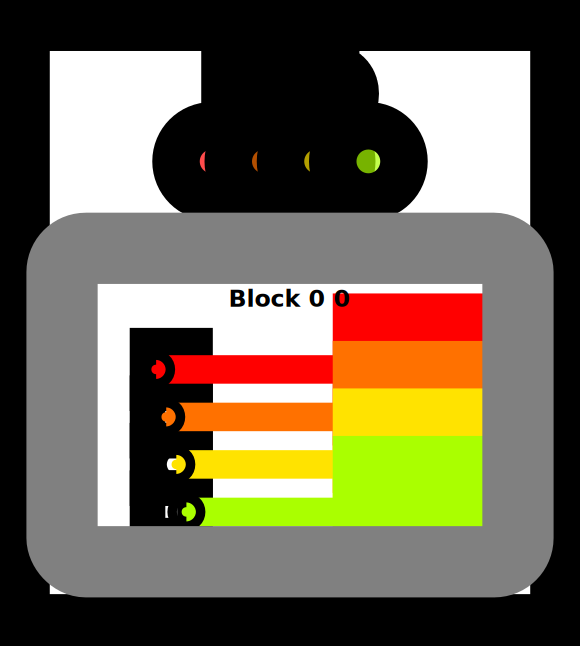

In [6]:
def map_spec(a):
    return a + 10

def map_test(cuda):
    def call(out, a) -> None:
        local_i = cuda.threadIdx.x
        out[local_i] = a[local_i] + 10

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Map", map_test, [a], out, threadsperblock=Coord(SIZE, 1), spec=map_spec
)
problem.show()

In [7]:
problem.check()

Passed Tests!


## Puzzle 2: Zip

# Zip
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 



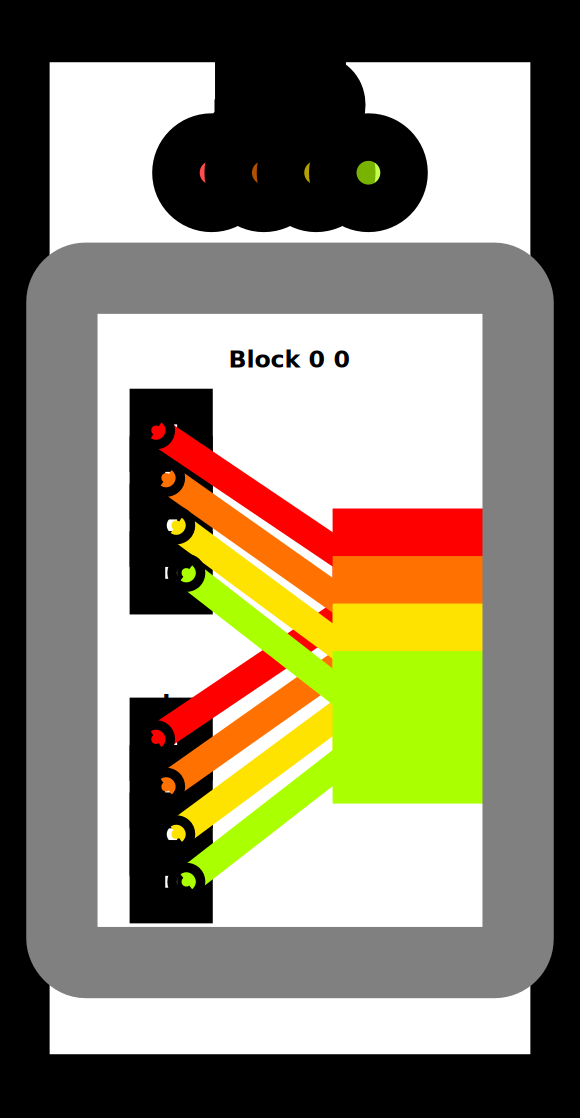

In [9]:
def zip_spec(a, b):
    return a + b


def zip_test(cuda):
    def call(out, a, b) -> None:
        local_i = cuda.threadIdx.x
        out[local_i] = a[local_i] + b[local_i]
        # FILL ME IN (roughly 1 lines)

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
b = np.arange(SIZE)
problem = CudaProblem(
    "Zip", zip_test, [a, b], out, threadsperblock=Coord(SIZE, 1), spec=zip_spec
)
problem.show()

In [10]:
problem.check()

Passed Tests!


## Puzzle 3 - Guards

# Guard
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



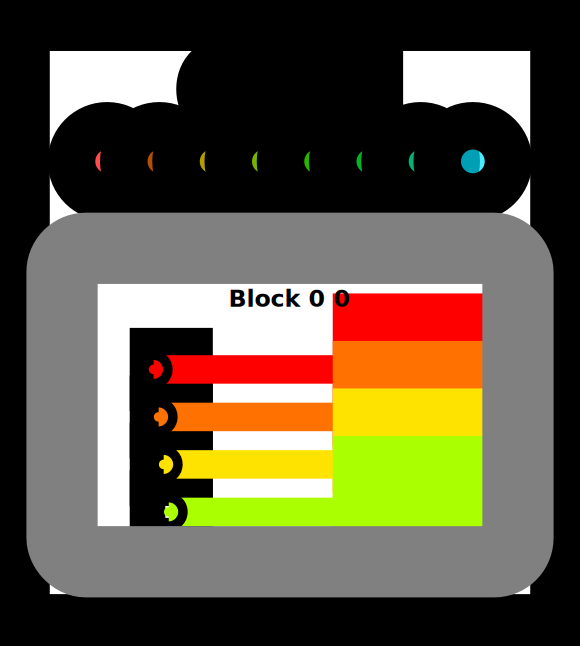

In [15]:
def map_guard_test(cuda):
    def call(out, a, size) -> None:
        local_i = cuda.threadIdx.x
        if local_i < size:
            out[local_i] = a[local_i] + 10

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Guard",
    map_guard_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(8, 1),
    spec=map_spec,
)
problem.show()

In [16]:
problem.check()

Passed Tests!


## Puzzle 4 - Map 2D

# Map 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



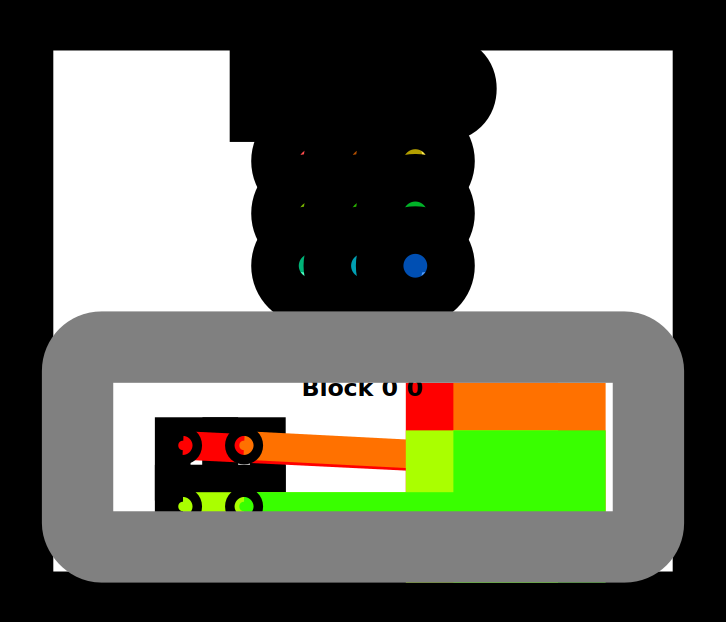

In [21]:
def map_2D_test(cuda):
    def call(out, a, size) -> None:
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        if local_i < size and local_j < size:
            out[local_i, local_j] = a[local_i, local_j] + 10

    return call


SIZE = 2
out = np.zeros((SIZE, SIZE))
a = np.arange(SIZE * SIZE).reshape((SIZE, SIZE))
problem = CudaProblem(
    "Map 2D", map_2D_test, [a], out, [SIZE], threadsperblock=Coord(3, 3), spec=map_spec
)
problem.show()

In [22]:
problem.check()

Passed Tests!


## Puzzle 5 - Broadcast

# Broadcast
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 



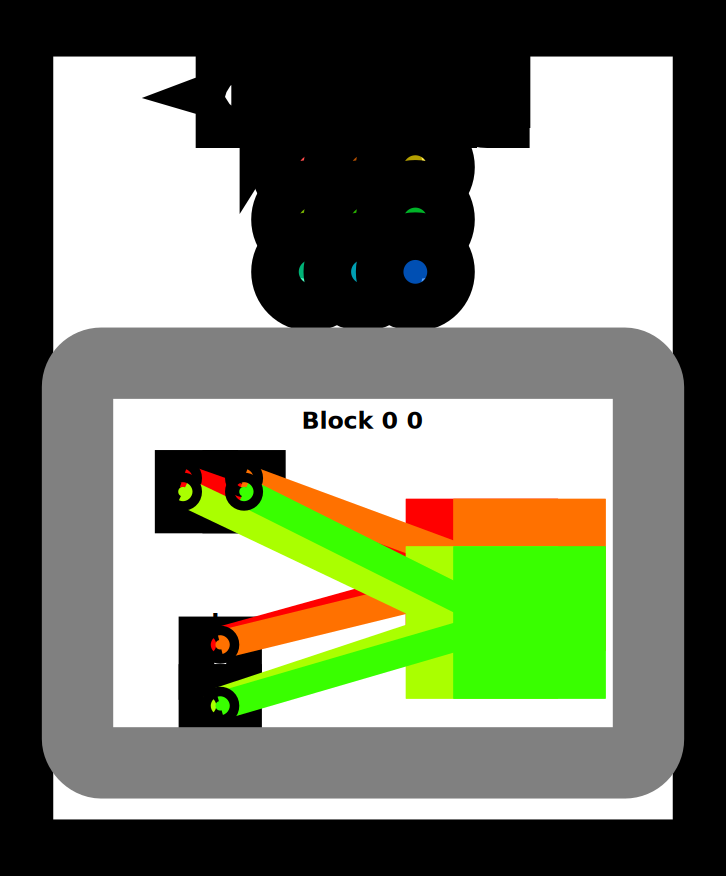

In [24]:
def broadcast_test(cuda):
    def call(out, a, b, size) -> None:
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        if local_i < size and local_j < size:
            out[local_i, local_j] = a[local_i, 0] + b[0, local_j]

    return call


SIZE = 2
out = np.zeros((SIZE, SIZE))
a = np.arange(SIZE).reshape(SIZE, 1)
b = np.arange(SIZE).reshape(1, SIZE)
problem = CudaProblem(
    "Broadcast",
    broadcast_test,
    [a, b],
    out,
    [SIZE],
    threadsperblock=Coord(3, 3),
    spec=zip_spec,
)
problem.show()

In [25]:
problem.check()

Passed Tests!


## Puzzle 6 - Blocks

# Blocks
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



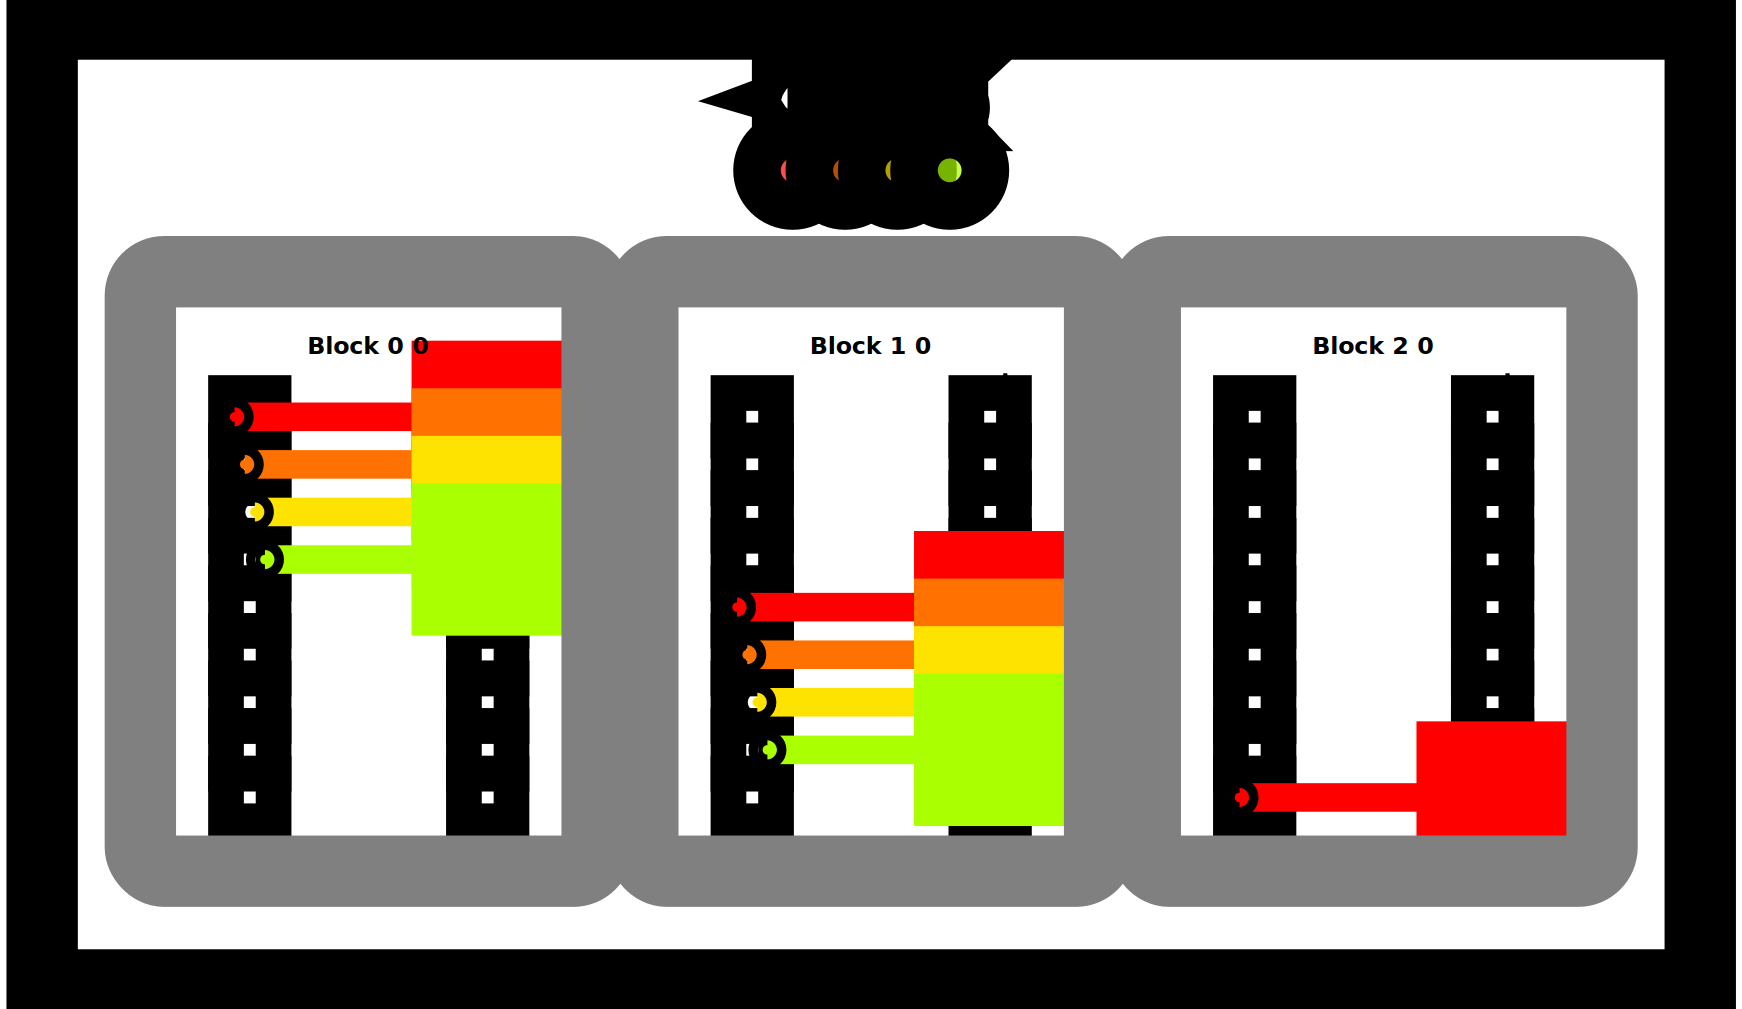

In [26]:
def map_block_test(cuda):
    def call(out, a, size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        if i < size:
            out[i] = a[i] + 10

    return call


SIZE = 9
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Blocks",
    map_block_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(4, 1),
    blockspergrid=Coord(3, 1),
    spec=map_spec,
)
problem.show()

In [27]:
problem.check()

Passed Tests!


## Puzzle 7 - Blocks 2D

# Blocks 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



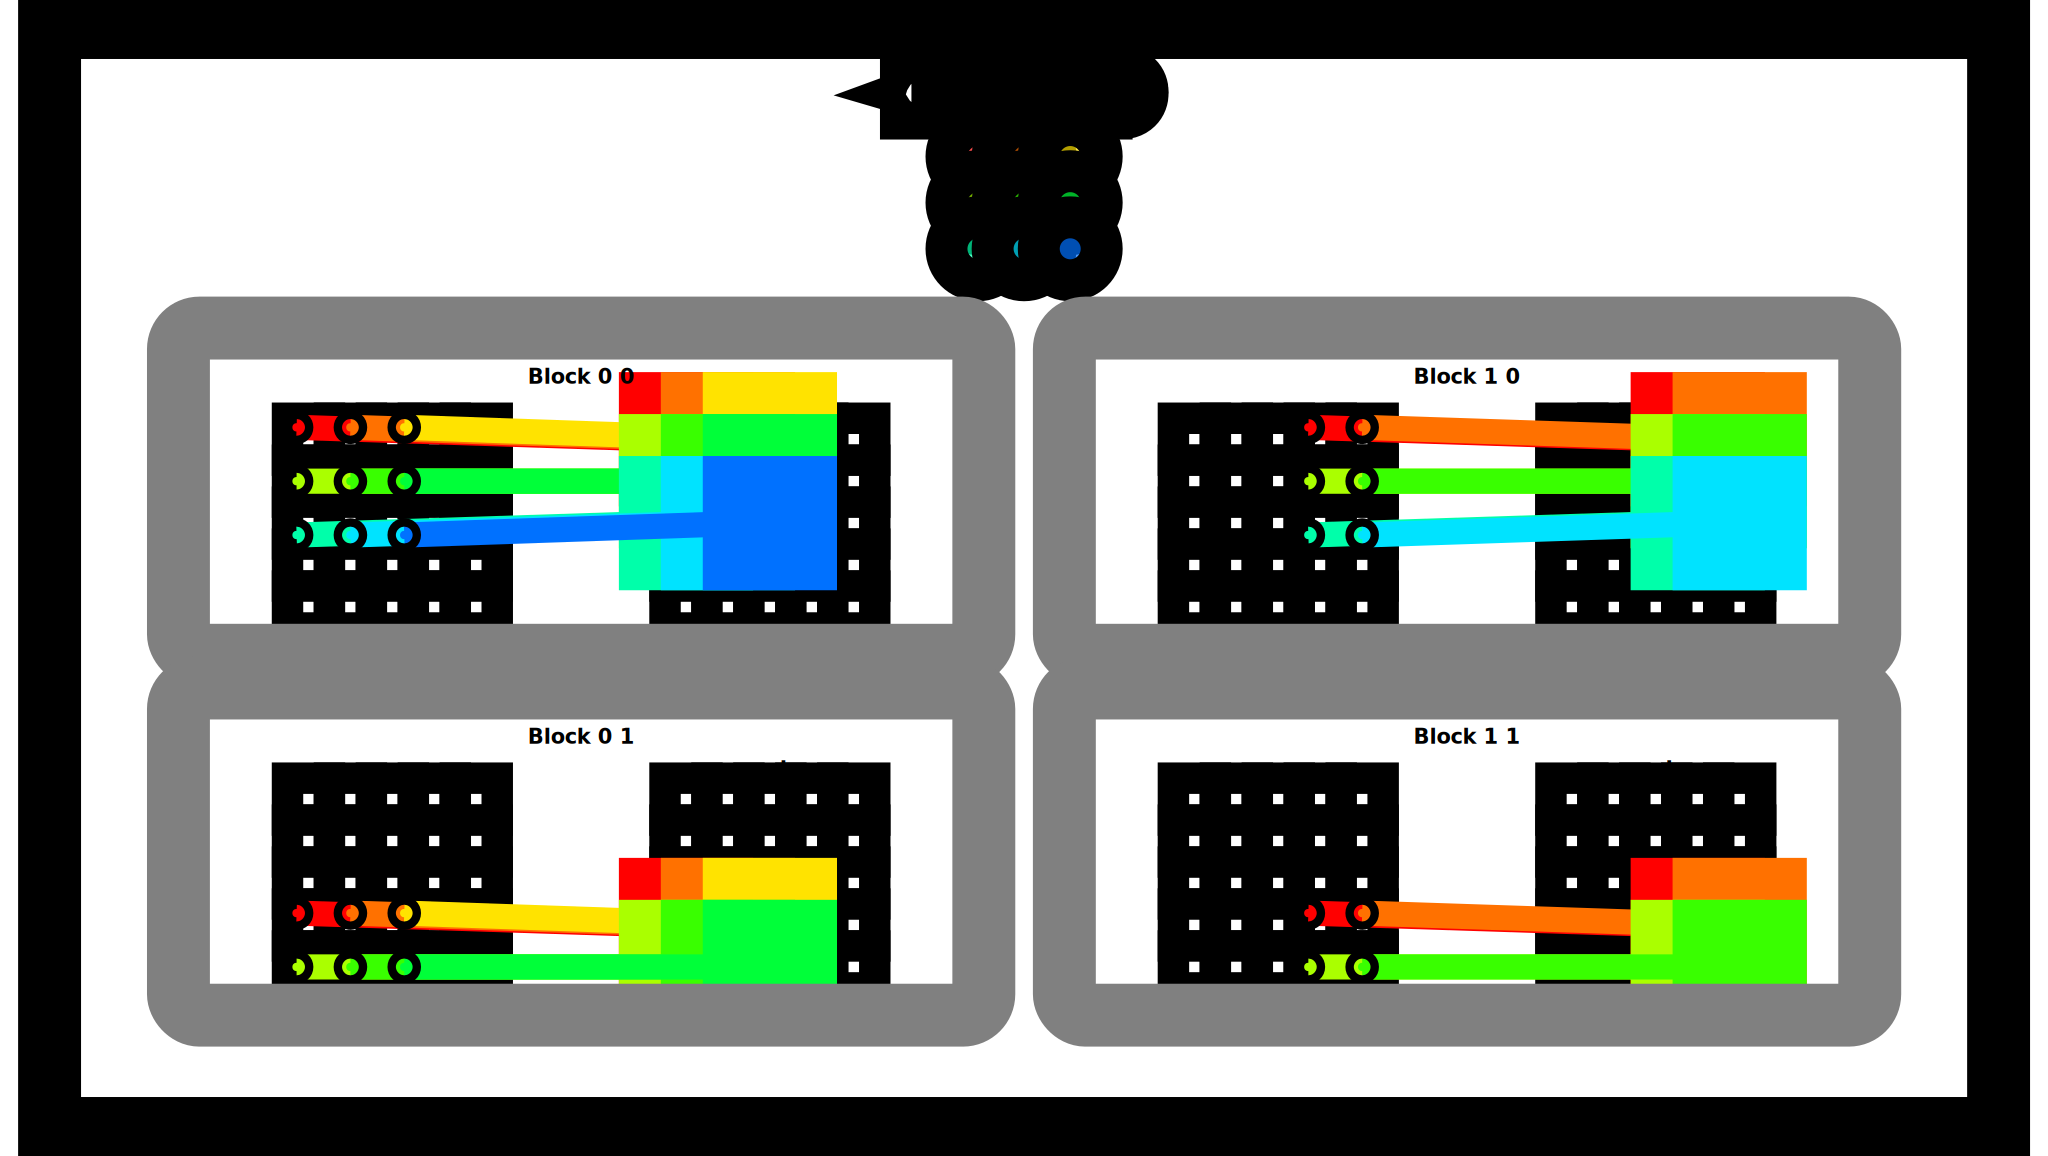

In [28]:
def map_block2D_test(cuda):
    def call(out, a, size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        j = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y
        if i < size and j < size:
            out[i, j] = a[i, j] + 10

    return call


SIZE = 5
out = np.zeros((SIZE, SIZE))
a = np.ones((SIZE, SIZE))

problem = CudaProblem(
    "Blocks 2D",
    map_block2D_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(3, 3),
    blockspergrid=Coord(2, 2),
    spec=map_spec,
)
problem.show()

In [29]:
problem.check()

Passed Tests!


## Puzzle 8 - Shared

# Shared
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             1 |             1 | 



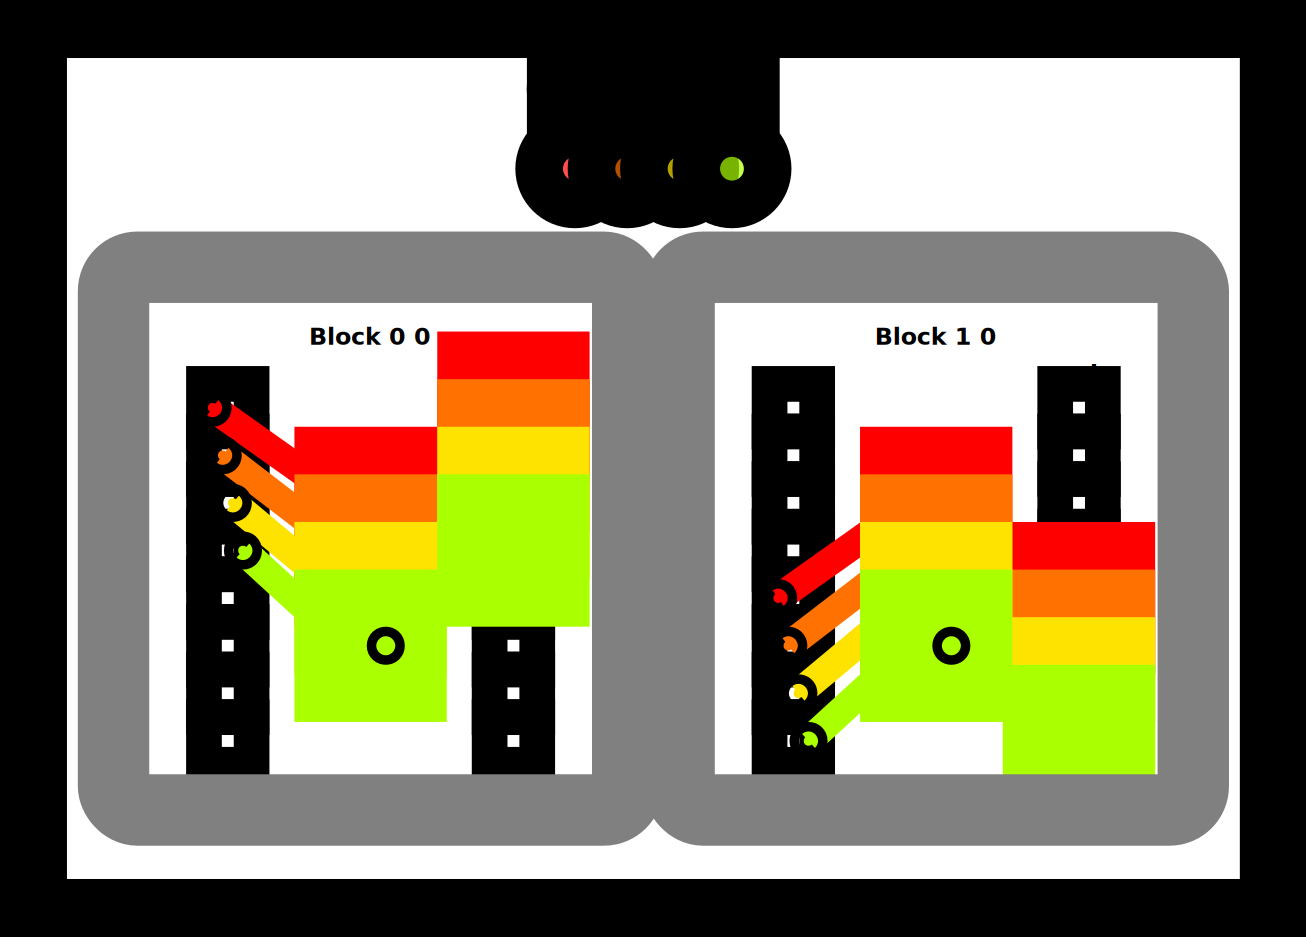

In [32]:
TPB = 4
def shared_test(cuda):
    def call(out, a, size) -> None:
        shared = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x

        if i < size:
            shared[local_i] = a[i]
            cuda.syncthreads()

        if i < size:
            out[i] = shared[local_i] + 10

    return call


SIZE = 8
out = np.zeros(SIZE)
a = np.ones(SIZE)
problem = CudaProblem(
    "Shared",
    shared_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(TPB, 1),
    blockspergrid=Coord(2, 1),
    spec=map_spec,
)
problem.show()

In [33]:
problem.check()

Passed Tests!
